## Импорт библиотек

In [1]:
import os
os.getcwd()

'C:\\Users\\Amirzhan\\python_notebooks\\Halyk_Bank'

In [2]:
import pandas as pd

## Читаем лог файл

In [3]:
log = pd.read_csv('logfile.log', sep = '\t')

In [4]:
log.head()

,ID,Timestamp,User Name,Type,Subtype,Result
0,8558,Apr 10th 2025 08:19:41,aleksey,Authentication,Login,Success
1,8560,Apr 10th 2025 08:42:26,beket,Authentication,Login,Success
2,8563,Apr 10th 2025 08:44:21,aleksey,Authentication,Logout,Success
3,8564,Apr 10th 2025 08:45:39,aleksey,Authentication,Login,Success
4,8565,Apr 10th 2025 08:52:14,aleksey,Authentication,Logout,Success


## Оптимизация колонок

In [5]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3812 non-null   int64 
 1   Timestamp  3812 non-null   object
 2   User Name  3812 non-null   object
 3   Type       3812 non-null   object
 4   Subtype    3812 non-null   object
 5   Result     3812 non-null   object
dtypes: int64(1), object(5)
memory usage: 178.8+ KB


In [6]:
log['Subtype'].value_counts()

Subtype
Login     3314
Logout     498
Name: count, dtype: int64

In [7]:
log['Type'].value_counts()

Type
Authentication    3812
Name: count, dtype: int64

In [8]:
log['Result'].value_counts()

Result
Success    3808
Fail          4
Name: count, dtype: int64

In [9]:
log.nunique()

ID           3812
Timestamp    3782
User Name      36
Type            1
Subtype         2
Result          2
dtype: int64

In [10]:
log['Type'].astype('category')

0       Authentication
1       Authentication
2       Authentication
3       Authentication
4       Authentication
             ...      
3807    Authentication
3808    Authentication
3809    Authentication
3810    Authentication
3811    Authentication
Name: Type, Length: 3812, dtype: category
Categories (1, object): ['Authentication']

In [11]:
log['Type'] = log['Type'].astype('category')
log['Subtype'] = log['Subtype'].astype('category')
log['Result'] = log['Result'].astype('category')
log['User Name'] = log['User Name'].astype('category')


In [12]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   ID         3812 non-null   int64   
 1   Timestamp  3812 non-null   object  
 2   User Name  3812 non-null   category
 3   Type       3812 non-null   category
 4   Subtype    3812 non-null   category
 5   Result     3812 non-null   category
dtypes: category(4), int64(1), object(1)
memory usage: 76.3+ KB


## Форматирование даты

In [13]:
log['Timestamp'].head()

0    Apr 10th 2025 08:19:41
1    Apr 10th 2025 08:42:26
2    Apr 10th 2025 08:44:21
3    Apr 10th 2025 08:45:39
4    Apr 10th 2025 08:52:14
Name: Timestamp, dtype: object

In [14]:
#pd.to_datetime(log['Timestamp'], format = '%m %d %Y %H:%M:%S').head()

In [15]:
log['Timestamp'] = log['Timestamp'].str.replace(r'(st|nd|rd|th)', '', regex=True)

In [16]:
log['Timestamp'].head()

0    Apr 10 2025 08:19:41
1    Apr 10 2025 08:42:26
2    Apr 10 2025 08:44:21
3    Apr 10 2025 08:45:39
4    Apr 10 2025 08:52:14
Name: Timestamp, dtype: object

In [17]:
pd.to_datetime(log['Timestamp'], format = '%b %d %Y %H:%M:%S')

0      2025-04-10 08:19:41
1      2025-04-10 08:42:26
2      2025-04-10 08:44:21
3      2025-04-10 08:45:39
4      2025-04-10 08:52:14
               ...        
3807   2025-09-09 11:02:36
3808   2025-09-09 17:07:13
3809   2025-09-09 17:44:16
3810   2025-09-09 17:45:41
3811   2025-09-09 20:36:19
Name: Timestamp, Length: 3812, dtype: datetime64[ns]

In [18]:
log['Timestamp'] = pd.to_datetime(log['Timestamp'], format = '%b %d %Y %H:%M:%S')

In [19]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         3812 non-null   int64         
 1   Timestamp  3812 non-null   datetime64[ns]
 2   User Name  3812 non-null   category      
 3   Type       3812 non-null   category      
 4   Subtype    3812 non-null   category      
 5   Result     3812 non-null   category      
dtypes: category(4), datetime64[ns](1), int64(1)
memory usage: 76.3 KB


## Добавление колонки дня недели

In [20]:
log['Timestamp'].dt.day_name()

0       Thursday
1       Thursday
2       Thursday
3       Thursday
4       Thursday
          ...   
3807     Tuesday
3808     Tuesday
3809     Tuesday
3810     Tuesday
3811     Tuesday
Name: Timestamp, Length: 3812, dtype: object

In [21]:
log['Day_of_week'] = log['Timestamp'].dt.day_name()

In [22]:
log.head()

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week
0,8558,2025-04-10 08:19:41,aleksey,Authentication,Login,Success,Thursday
1,8560,2025-04-10 08:42:26,beket,Authentication,Login,Success,Thursday
2,8563,2025-04-10 08:44:21,aleksey,Authentication,Logout,Success,Thursday
3,8564,2025-04-10 08:45:39,aleksey,Authentication,Login,Success,Thursday
4,8565,2025-04-10 08:52:14,aleksey,Authentication,Logout,Success,Thursday


## Добавление дополнительных колонок по условию

In [23]:
log['Is_work_day'] = log['Timestamp'].dt.weekday < 5

In [24]:
log['Is_work_time'] = log['Timestamp'].dt.time.between(
    pd.to_datetime('09:00').time(),
    pd.to_datetime('18:00').time()
)

In [25]:
log.head()

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week,Is_work_day,Is_work_time
0,8558,2025-04-10 08:19:41,aleksey,Authentication,Login,Success,Thursday,True,False
1,8560,2025-04-10 08:42:26,beket,Authentication,Login,Success,Thursday,True,False
2,8563,2025-04-10 08:44:21,aleksey,Authentication,Logout,Success,Thursday,True,False
3,8564,2025-04-10 08:45:39,aleksey,Authentication,Login,Success,Thursday,True,False
4,8565,2025-04-10 08:52:14,aleksey,Authentication,Logout,Success,Thursday,True,False


In [26]:
log['Outside_work_time'] = ~(log['Is_work_day'] & log['Is_work_time'])

In [27]:
log.head()

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week,Is_work_day,Is_work_time,Outside_work_time
0,8558,2025-04-10 08:19:41,aleksey,Authentication,Login,Success,Thursday,True,False,True
1,8560,2025-04-10 08:42:26,beket,Authentication,Login,Success,Thursday,True,False,True
2,8563,2025-04-10 08:44:21,aleksey,Authentication,Logout,Success,Thursday,True,False,True
3,8564,2025-04-10 08:45:39,aleksey,Authentication,Login,Success,Thursday,True,False,True
4,8565,2025-04-10 08:52:14,aleksey,Authentication,Logout,Success,Thursday,True,False,True


In [28]:
log['Outside_work_time'].value_counts()

Outside_work_time
False    1923
True     1889
Name: count, dtype: int64

In [29]:
log.columns

Index(['ID', 'Timestamp', 'User Name', 'Type', 'Subtype', 'Result',
       'Day_of_week', 'Is_work_day', 'Is_work_time', 'Outside_work_time'],
      dtype='object')

In [30]:
log.head()

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week,Is_work_day,Is_work_time,Outside_work_time
0,8558,2025-04-10 08:19:41,aleksey,Authentication,Login,Success,Thursday,True,False,True
1,8560,2025-04-10 08:42:26,beket,Authentication,Login,Success,Thursday,True,False,True
2,8563,2025-04-10 08:44:21,aleksey,Authentication,Logout,Success,Thursday,True,False,True
3,8564,2025-04-10 08:45:39,aleksey,Authentication,Login,Success,Thursday,True,False,True
4,8565,2025-04-10 08:52:14,aleksey,Authentication,Logout,Success,Thursday,True,False,True


## Разделяем DataFrame(Таблицу) на два DataFrame, outside и during

In [31]:
outside_worktime = log[log['Outside_work_time'] == True]
during_worktime = log[log['Outside_work_time'] == False]

In [32]:
len(outside_worktime)

1889

In [33]:
len(during_worktime)

1923

## Создание Эксель файла (пока без данных, пустая страница)

In [34]:
excel_file = pd.ExcelWriter("testwork.xlsx")
excel_file

## Добавление 3 листов (sheets)

In [35]:
log.to_excel(excel_writer = excel_file, sheet_name = "all_logs", index = False)

In [36]:
outside_worktime.to_excel(excel_writer = excel_file, sheet_name = "Outside", index = False)

In [37]:
during_worktime.to_excel(excel_writer = excel_file, sheet_name = "During", index = False)

## Экспорт данных

In [38]:
excel_file.close()

## Визуализация данных

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
print(log['Timestamp'].min())
print(log['Timestamp'].max())

2025-01-14 08:50:00
2026-01-14 09:20:04


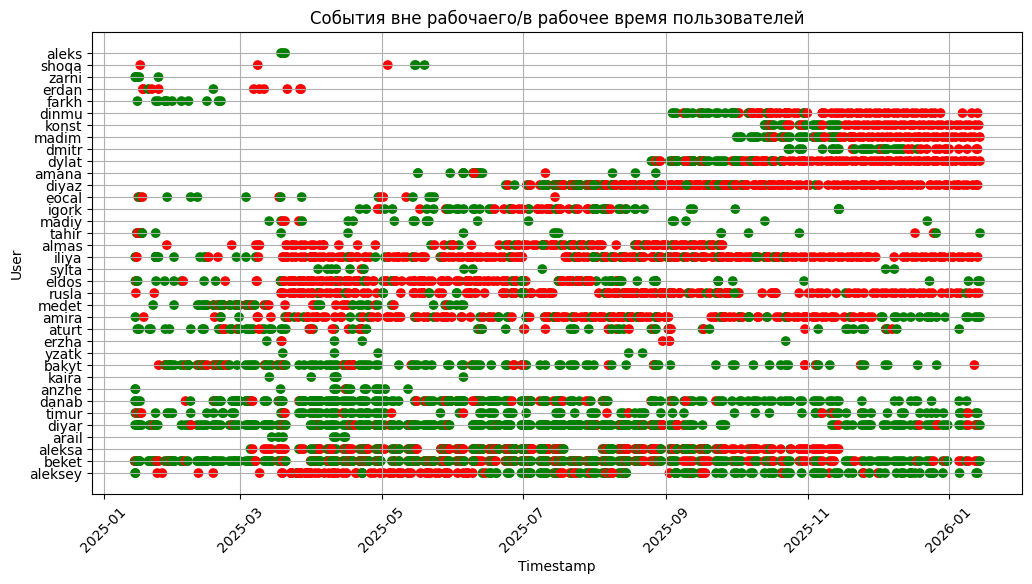

In [41]:
# Красные точки — вне рабочего времени
# Наброска где можем увидеть каждого пользователя
# Тут особа непонятно визуализация
plt.figure(figsize=(12,6))
plt.scatter(log['Timestamp'], log['User Name'], 
            c=log['Outside_work_time'].map({True:'red', False:'green'}),
            label='Event')

plt.xlabel('Timestamp')
plt.ylabel('User')
plt.title('События вне рабочаего/в рабочее время пользователей')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [42]:
log['Hour'] = log['Timestamp'].dt.hour
# Можем посмотреть в какое время пользователи чаще всего взаимодействовали 

In [43]:
log['Hour'].value_counts().sort_index()
# Обращаем внимание на то, что чаще люди заходят/выходят в 8 утра и в 8 вечера

Hour
0      66
1      28
2      23
3      10
4      55
5      43
6      91
7     154
8     707
9     620
10    158
11    102
12     67
13     48
14     83
15    108
16    368
17    466
18    115
19     86
20    318
21     46
22     24
23     26
Name: count, dtype: int64

In [44]:
log['Hour'][~log['Hour'].between(9, 18)].value_counts().sort_index()
# Убираем рабочее время
# Можем убедиться что, люди взаимодействуют в 8 утра и в 8 вечера

Hour
0      66
1      28
2      23
3      10
4      55
5      43
6      91
7     154
8     707
19     86
20    318
21     46
22     24
23     26
Name: count, dtype: int64

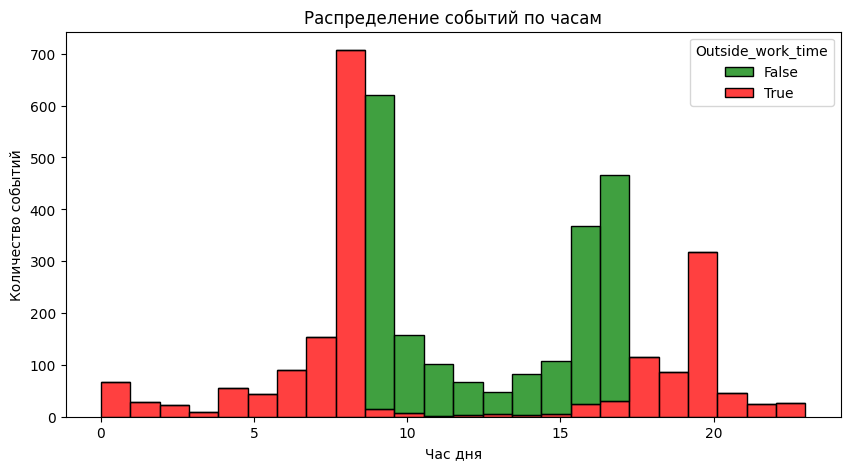

In [45]:
# теперь в гистаграмме отчетливо видно, в какое время чаще заходят/выходят
plt.figure(figsize=(10,5))
sns.histplot(data=log, x='Hour', hue='Outside_work_time', multiple='stack', 
             palette={True:'red', False:'green'}, bins = 24)
plt.title('Распределение событий по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество событий')
plt.show()

In [46]:
each_user = log.groupby('User Name')
# группирируем по именам пользователей, всего их 36

C:\Users\Amirzhan\AppData\Local\Temp\ipykernel_14080\269533430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  each_user = log.groupby('User Name')


In [47]:
each_user.size().sort_values(ascending=False)
# считаем сколько запросов делал каждый пользователь

User Name
beket      360
aleksa     351
diyar      346
diyaz      294
iliya      245
danab      245
rusla      210
eldos      206
amira      200
aleksey    192
bakyt      144
dylat      143
almas      115
timur      111
aturt       84
dinmu       84
igork       73
madim       71
medet       61
konst       58
dmitr       41
tahir       24
amana       20
madiy       20
eocal       19
anzhe       16
farkh       12
erdan       12
sylta       12
erzha        9
zarni        7
arail        7
shoqa        6
kaira        6
yzatk        5
aleks        3
dtype: int64

In [48]:
each_user.nth(0).head()
# После группировки у каждой группы свой отдельный индекс, который начинается с нуля
# Смотрим самое первое действие каждого пользователя
# Тут соотвественно 36 строк

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week,Is_work_day,Is_work_time,Outside_work_time,Hour
0,8558,2025-04-10 08:19:41,aleksey,Authentication,Login,Success,Thursday,True,False,True,8
1,8560,2025-04-10 08:42:26,beket,Authentication,Login,Success,Thursday,True,False,True,8
6,8567,2025-04-10 08:57:52,aleksa,Authentication,Login,Success,Thursday,True,False,True,8
7,8568,2025-04-10 09:07:07,arail,Authentication,Login,Success,Thursday,True,True,False,9
8,8573,2025-04-10 09:46:42,diyar,Authentication,Login,Success,Thursday,True,True,False,9


In [49]:
len(each_user.nth(0))

36

In [50]:
each_user.get_group('yzatk')
# можем детально посмотреть действия каждого пользователя

,ID,Timestamp,User Name,Type,Subtype,Result,Day_of_week,Is_work_day,Is_work_time,Outside_work_time,Hour
14,8609,2025-04-10 16:26:56,yzatk,Authentication,Login,Success,Thursday,True,True,False,16
267,11997,2025-04-29 12:27:00,yzatk,Authentication,Login,Success,Tuesday,True,True,False,12
496,105086,2025-08-15 17:57:01,yzatk,Authentication,Login,Success,Friday,True,True,False,17
593,114623,2025-08-21 17:34:54,yzatk,Authentication,Login,Success,Thursday,True,True,False,17
2350,6095,2025-03-19 09:05:21,yzatk,Authentication,Login,Success,Wednesday,True,True,False,9


In [51]:
user_summary = log.groupby('User Name')['Outside_work_time']
# после группировка по пользователям, оставляем только Outside_work_time столбец который нам нужен

C:\Users\Amirzhan\AppData\Local\Temp\ipykernel_14080\4090137148.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_summary = log.groupby('User Name')['Outside_work_time']


In [52]:
user_summary = log.groupby('User Name')['Outside_work_time'].sum().sort_values(ascending=False)
# В python True считается как 1, a False как 0.
# По условию у нас True это те пользотели, которые взаимодействовали вне рабочее время. Мы как раз ищем этих пользователей

C:\Users\Amirzhan\AppData\Local\Temp\ipykernel_14080\2289755961.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_summary = log.groupby('User Name')['Outside_work_time'].sum().sort_values(ascending=False)


In [53]:
user_summary
# здесб видим что, больше всего вне рабочее время взаимодействовал пользовател Diyaz, за ним Aleksa и т.д.

User Name
diyaz      228
aleksa     209
iliya      185
rusla      180
eldos      140
amira      136
beket      130
almas       96
dylat       94
aleksey     94
dinmu       61
diyar       45
madim       41
konst       39
danab       36
bakyt       32
igork       29
aturt       24
medet       21
dmitr       15
timur       14
erdan       10
tahir        8
eocal        7
erzha        4
madiy        3
amana        3
shoqa        3
sylta        1
anzhe        1
aleks        0
arail        0
kaira        0
farkh        0
yzatk        0
zarni        0
Name: Outside_work_time, dtype: int64

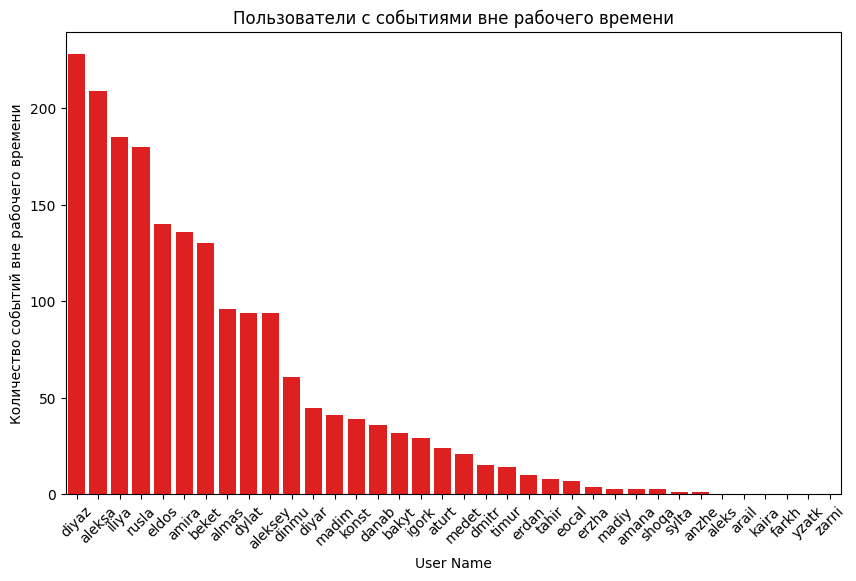

In [54]:
# делаем визуализацию пользователей, которые заходили/выходили из системы вне рабочее время
plt.figure(figsize=(10,6))
sns.barplot(x=user_summary.index, y=user_summary.values, order=user_summary.index, color='red')
plt.xticks(rotation=45)
plt.ylabel('Количество событий вне рабочего времени')
plt.title('Пользователи с событиями вне рабочего времени')
plt.show()